In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. CARGAR Y LIMPIAR DATOS DEL EXCEL (Censo 2024) ---

# Ruta donde guardaste el archivo Excel (¡Asegúrate de cambiar esta ruta!)
archivo_excel = 'D2_Indice-de-envejecimiento-por-sexo.xlsx' 

# Usamos read_excel:
# sheet_name=1: Carga la segunda hoja (índice 1) que contiene los datos por comuna.
# header=3: Indica que la fila 4 (índice 3 en Python) contiene los nombres de las columnas.
try:
    df_crudo = pd.read_excel(
        archivo_excel, 
        sheet_name=2, 
        header=3
    )
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta especificada: {archivo_excel}")
    print("Por favor, verifica la ruta y el nombre del archivo.")
    exit()

In [2]:
df_crudo.head()

,Código región,Región,Código provincia,Provincia,Código comuna,Comuna,Sexo,Población censada,0-14,15-64,65 años o más,Índice de envejecimiento
0,0,País,0.0,País,0.0,País,Total País,18480432.0,3274648.0,12618546.0,2587238.0,79
1,0,País,0.0,País,0.0,País,Hombre,8967033.0,1668530.0,6171457.0,1127046.0,67.5
2,0,País,0.0,País,0.0,País,Mujer,9513399.0,1606118.0,6447089.0,1460192.0,90.9
3,15,Arica y Parinacota,151.0,Arica,15101.0,Arica,Total Comuna,241653.0,47551.0,163466.0,30636.0,64.4
4,15,Arica y Parinacota,151.0,Arica,15101.0,Arica,Hombre,118844.0,24128.0,80967.0,13749.0,57


In [81]:
df_filtrado = df_filtrado_o[df_filtrado_o['Provincia'] == 'Santiago'].copy()

In [83]:
df_filtrado_o.head()

,Código región,Región,Código provincia,Provincia,Código comuna,Comuna,Sexo,Población censada,0-14,15-64,65 años o más,Índice de envejecimiento
3,15,Arica y Parinacota,151.0,Arica,15101.0,Arica,Total Comuna,241653.0,47551.0,163466.0,30636.0,64.4
6,15,Arica y Parinacota,151.0,Arica,15102.0,Camarones,Total Comuna,861.0,106.0,527.0,228.0,215.1
9,15,Arica y Parinacota,152.0,Parinacota,15201.0,Putre,Total Comuna,1547.0,250.0,1041.0,256.0,102.4
12,15,Arica y Parinacota,152.0,Parinacota,15202.0,General Lagos,Total Comuna,508.0,123.0,269.0,116.0,94.3
15,1,Tarapacá,11.0,Iquique,1101.0,Iquique,Total Comuna,199587.0,37595.0,137764.0,24228.0,64.4


In [85]:
#df_filtrado = df_filtrado_o[df_filtrado_o['Provincia'] == 'Santiago'].copy()

In [87]:


# 3. SELECCIONAR COLUMNAS PARA EL MAPA DE CALOR
# Incluimos el Índice de Envejecimiento ya que es la métrica clave del dataset
columnas_mapa_calor = ['Comuna', '0-14', '15-64', '65 años o más', 'Índice de envejecimiento']
df_final = df_filtrado[columnas_mapa_calor].set_index('Comuna')


In [89]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Santiago to Vitacura
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0-14                      32 non-null     float64
 1   15-64                     32 non-null     float64
 2   65 años o más             32 non-null     float64
 3   Índice de envejecimiento  32 non-null     object 
dtypes: float64(3), object(1)
memory usage: 1.2+ KB


In [91]:

# Convertir columnas a tipo numérico (si no lo están)
df_final[['0-14', '15-64', '65 años o más', 'Índice de envejecimiento']] = \
    df_final[['0-14', '15-64', '65 años o más', 'Índice de envejecimiento']].apply(pd.to_numeric, errors='coerce')

# --- 4. CÁLCULO DEL PORCENTAJE (Opcional, pero útil para comparar perfiles) ---
# Calculamos el porcentaje de cada grupo de edad sobre el total de la comuna para usarlo en el heatmap de perfil.
df_final['Total_Poblacion'] = df_final[['0-14', '15-64', '65 años o más']].sum(axis=1)

df_perfil = df_final[['0-14', '15-64', '65 años o más']].div(df_final['Total_Poblacion'], axis=0) * 100

# Renombrar columnas para claridad
df_perfil.columns = ['% 0-14', '% 15-64', '% 65+']

print("DataFrame listo para el mapa de calor de perfiles de edad:")
print(df_perfil.head())

DataFrame listo para el mapa de calor de perfiles de edad:
                % 0-14    % 15-64      % 65+
Comuna                                      
Santiago     12.692546  79.232596   8.074858
Cerrillos    18.652180  68.343505  13.004316
Cerro Navia  17.576424  67.702161  14.721415
Conchalí     16.537952  67.631408  15.830640
El Bosque    17.718364  66.800209  15.481428


In [93]:
df_perfil 

,% 0-14,% 15-64,% 65+
Comuna,,,
Santiago,12.692546,79.232596,8.074858
Cerrillos,18.652180,68.343505,13.004316
Cerro Navia,17.576424,67.702161,14.721415
Conchalí,16.537952,67.631408,15.830640
El Bosque,17.718364,66.800209,15.481428
Estación Central,17.219095,72.125778,10.655127
Huechuraba,19.113429,69.632052,11.254518
Independencia,17.508530,71.512617,10.978853
La Cisterna,16.612542,69.063660,14.323798


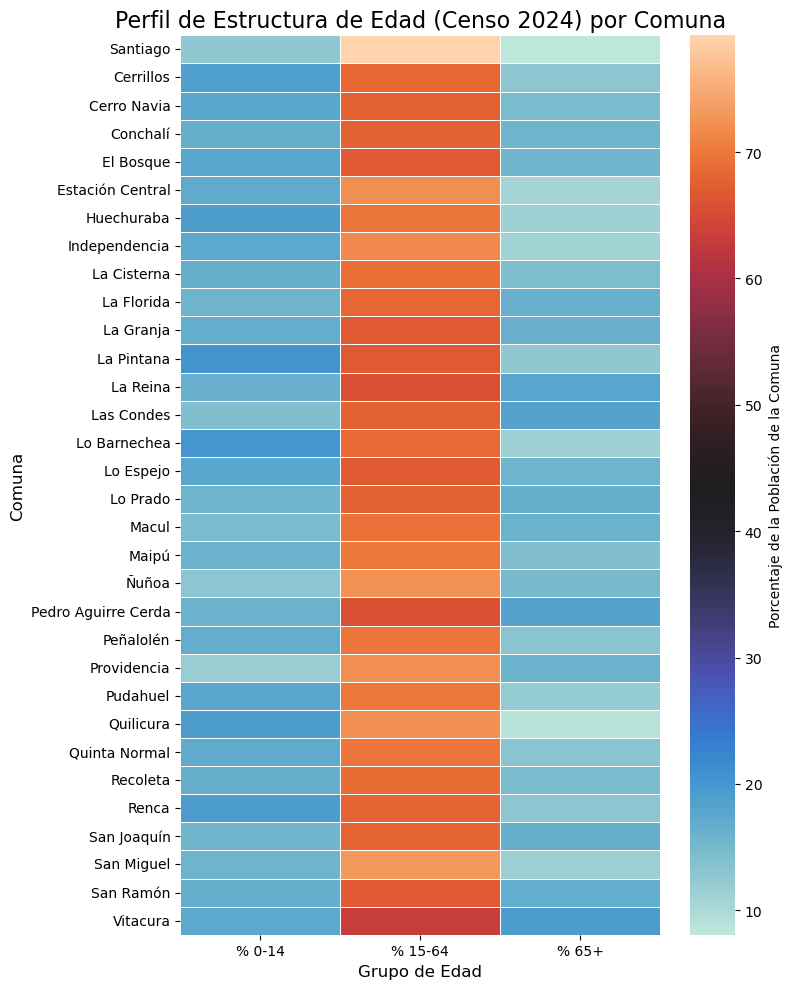

In [129]:
# --- 5. GENERACIÓN DEL MAPA DE CALOR ---

plt.figure(figsize=(8, 10)) # Tamaño ajustado para todas las comunas

sns.heatmap(
    df_perfil,
    cmap="icefire",
    linewidths=.5,
    cbar_kws={'label': 'Porcentaje de la Población de la Comuna'}
)

plt.title('Perfil de Estructura de Edad (Censo 2024) por Comuna', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Comuna', fontsize=12)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()